<a href="https://colab.research.google.com/github/Tsyhankova/goit_python/blob/main/Hw3_1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Часть вторая: Анализ файлов**

Проведите анализ файла 2017_jun_final.csv. Файл содержит результаты опроса разработчиков в июне 2017 года.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте файл 2017_jun_final.csv с помощью метода read_csv

In [ ]:
url = 'https://drive.google.com/file/d/1N9olzaYSJA9QqO8Dfx1LLl14l2TU-5kV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
jun_final = pd.read_csv(path)

print(jun_final)

         N                 Должность Язык.программирования  ... salary Валюта  cls
0        1        Junior QA engineer                   NaN  ...    400    NaN   QA
1        2        Junior QA engineer                   NaN  ...    430    NaN   QA
2        3         Software Engineer               C#/.NET  ...   2500    NaN  DEV
3        4         Software Engineer            JavaScript  ...   2000    NaN  DEV
4        5  Senior Software Engineer            JavaScript  ...   4500    NaN  DEV
...    ...                       ...                   ...  ...    ...    ...  ...
8699  8700               QA engineer                   NaN  ...    700    NaN   QA
8700  8701                 Marketing                   NaN  ...    400    NaN  NaN
8701  8702  Junior Software Engineer            Ruby/Rails  ...    800    NaN  DEV
8702  8703                 Team lead                   NaN  ...   2600    NaN   PM
8703  8704  Senior Software Engineer                  Java  ...   5000    NaN  DEV

[87

Прочитайте полученную таблицу используя метод head

In [ ]:
jun_final.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Университет,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,ХНЭУ,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,ХНЭУ,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,ДонНТУ,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,NaN,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,NaN,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Определите размер таблицы с помощью метода shape

In [ ]:
jun_final.shape

(8704, 25)

Определите типы всех столбцов с помощью dataframe.dtypes

In [ ]:
jun_final.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [ ]:
jun_final.isnull().sum(axis = 0, skipna = True)

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

Удалите все столбцы с пропусками, кроме столбца "Язык.программирования"

In [ ]:
jun_final = jun_final.drop(["cls", "Валюта", "Предметная.область", "Университет", "Специализация"], axis=1)
jun_final.isnull().sum(axis = 0, skipna = True)

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

Удалите все строки в исходной таблице с помощью метода dropna

In [ ]:
jun_final = jun_final.dropna()

Определите новый размер таблицы с помощью метода shape

In [ ]:
jun_final.shape

(4854, 20)

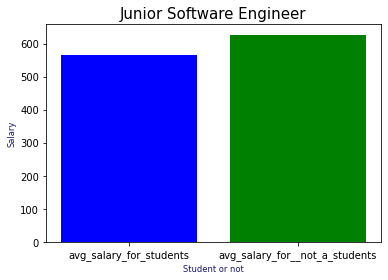

In [ ]:
df = jun_final[jun_final['Должность'] == 'Junior Software Engineer']
avg_salary_for_students = df['Зарплата.в.месяц'][df["Еще.студент"] == True].mean()
avg_salary_for__not_a_students = df['Зарплата.в.месяц'][df["Еще.студент"] == False].mean()


plt.bar(
    ["avg_salary_for_students", "avg_salary_for__not_a_students"],
    [avg_salary_for_students, avg_salary_for__not_a_students],
    color=["b", "g"],
)

plt.xlabel("Student or not", fontsize="small", color="midnightblue")
plt.ylabel("Salary", fontsize="small", color="midnightblue")
plt.title('Junior Software Engineer', fontsize=15)
plt.show()


Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python

In [ ]:
python_data = jun_final[jun_final['Язык.программирования'] == 'Python']
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


Определите размер таблицы python_data с помощью метода shape

In [ ]:
python_data.shape

(207, 20)

Используя метод groupby выполните группировку по столбцу "Должность"

In [ ]:
group_by_position = python_data.groupby("Должность")
group_by_position.first()

,N,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
Должность,,,,,,,,,,,,,,,,,,,
Junior Software Engineer,88,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.50,600
Senior Software Engineer,303,Python,10 и более лет,0.5,3500,-300,Киев,до 200 человек,Продуктовая,мужской,30,Высшее,False,выше среднего,12/06/2017 13:46:24,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,10.0,0.50,3500
Software Engineer,13,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.00,800
System Architect,5749,Python,10 и более лет,0.25,3000,0,Киев,до 50 человек,Продуктовая,мужской,40,Высшее,False,выше среднего,20/06/2017 18:40:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,10.0,0.25,3000
Technical Lead,2633,Python,4,1.5,3500,1000,Киев,до 50 человек,Продуктовая,мужской,23,Незаконченное высшее,False,выше среднего,13/06/2017 12:37:02,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,4.0,1.50,3500


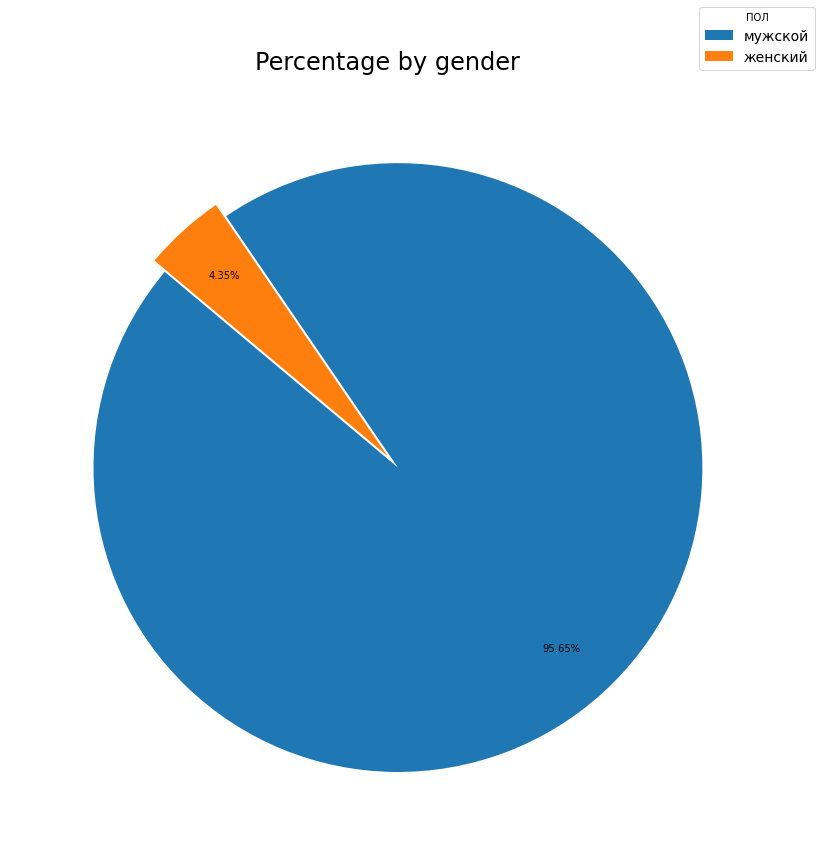

In [ ]:
labels = ["мужской", "женский"]

data = [python_data["Пол"][python_data["Пол"] == "мужской"].count(), python_data["Пол"][python_data["Пол"] == "женский"].count()]
explode = [0.05, 0]
plt.pie(
    data,
    explode=explode,
    autopct="%.2f%%",
    startangle=140,
    pctdistance=0.8,
    labeldistance=1.05,
)
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Percentage by gender', fontsize=24)
plt.legend( labels, title="ПОЛ", fontsize=14, loc="upper left", bbox_to_anchor=(0.9, 0.1, 0.1, 1))

Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"

In [ ]:
import numpy as np


group_by_position.agg({'Зарплата.в.месяц' : 'min', 'Зарплата.в.месяц' : 'max'})

salary1 = group_by_position.agg({'Зарплата.в.месяц' : 'max'})
salary1 = salary1.rename({"Зарплата.в.месяц" : "max_salary"}, axis=1)
salary2 = group_by_position.agg({'Зарплата.в.месяц' : 'min'})
salary2 = salary2.rename({"Зарплата.в.месяц" : "min_salary"}, axis=1)
salary = pd.concat([salary1, salary2], axis=1)
salary

,max_salary,min_salary
Должность,,
Junior Software Engineer,1250,100
Senior Software Engineer,9200,1300
Software Engineer,5400,500
System Architect,5000,3000
Technical Lead,6200,1425


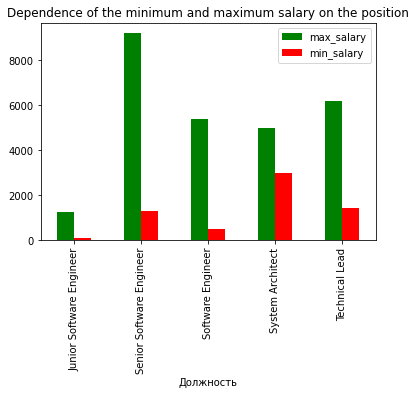

In [ ]:
max_salary = salary["max_salary"]
min_salary = salary["min_salary"]
df = pd.DataFrame({'max_salary': max_salary,
                   'min_salary': min_salary})
ax = df.plot.bar(rot=90, color = {'max_salary':'green', 'min_salary':'red'}, title = "Dependence of the minimum and maximum salary on the position")

Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"

In [ ]:
salary_mean = salary.apply(np.mean, axis=1) 
salary["avg_salary"] = [s for s in salary_mean]
salary

,max_salary,min_salary,avg_salary
Должность,,,
Junior Software Engineer,1250,100,675.0
Senior Software Engineer,9200,1300,5250.0
Software Engineer,5400,500,2950.0
System Architect,5000,3000,4000.0
Technical Lead,6200,1425,3812.5


Создайте описательную статистику с помощью метода describe для нового столбца.

In [ ]:
salary['avg_salary'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg_salary, dtype: float64

Сохраните полученную таблицу в CSV файл

In [ ]:
salary.to_csv('salary_python_jun_final.csv')